# Imports and Installs

In [40]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os
import re
import string


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Text Preprocessing

In [43]:
# Open the text file
file_path = 'stop_hinglish.txt'  # Replace 'your_file_path.txt' with the path to your text file
with open(file_path, 'r', encoding='utf-8') as file:
    # Read the lines from the file and store them in a list
    data_list = file.readlines()

# Strip newline characters and whitespace from each line
data_list = [line.strip() for line in data_list]

hinglish_stopwords = [
    'lie','ta', 'te', 'ti', 'na', 'ne', 'ni',
    'nga', 'nge', 'ngi', 'ya', 'ye', 'yi', 'a','ji'
    'e', 'i', 'un', 'en', 'in', 'ega', 'egi', 'enge',
    'ega', 'egi', 'enge', 'ata', 'ate', 'ati', 'ata',
    'ate', 'ati','rt','mem','aura','ab', 'aur', 'is','bhai','bro',
    'iska', 'iski', 'iske', 'isliye', 'isi', 'in','isa', 'inka',
    'inki', 'inke', 'inko', 'inheen', 'inhonne', 'is', 'un',
    'unka', 'unki', 'unke', 'unko', 'unheen', 'unhonne', 'us',
    'uska', 'uski', 'uske', 'usko', 'usi', 'ek', 'kai', 'karna',
    'kisi', 'kise', 'koi', 'kuch', 'kaise','karate','eka' ,'jab', 'jahan', 'jin','rah','raha'
    'jinka', 'jinki', 'jinke', 'jinko', 'jinhen', 'jinhonne', 'jis',
    'jiska', 'jiski', 'jiske', 'jisko', 'jise', 'jaise', 'jo', 'tak',
    'tab', 'tarah', 'tha', 'thi', 'the', 'na', 'nahin', 'na', 'par',
    'parantu', 'pahle', 'poora', 'poori', 'pe', 'phir','para','' ,'bani', 'bahut',
    'bahi', 'buri', 'bhi', 'bhinna', 'magar', 'mano', 'matra', 'mein',
    'yadi', 'yah', 'yahi', 'ya', 'rakhen', 'raha', 'rahi', 'rahe', 'le',
    'lekin', 'liye', 'liya', 'liye', 'vgairah', 'vah', 'vahan', 'vahin',
    'vale', 'vishay', 'sang', 'sakta', 'sakte', 'sakti', 'sabhi', 'sarikhe',
    'se', 'so', 'hari', 'ha', 'hai', 'hain', 'hua', 'hui', 'hue', 'hun', 'hun',
    'hunga', 'hungi','hindu','modi','pakistan','bjp','hunge', 'hun', 'hunga', 'hungi', 'hunge', 'ho', 'hoga',
    'hogi', 'honge', 'hota', 'hoti', 'hote', 'hona', 'hun', 'hun', 'hunga',
    'hungi', 'hunge', 'main', 'mujhe', 'mujhko', 'mera', 'meri', 'mere', 'ham',
    'hamen', 'hamko', 'hamara', 'hamari', 'hamare', 'tum', 'tumhe', 'tumko', 'tera',
    'teri', 'tere', 'aap', 'aapko', 'aapka', 'aapki', 'aapke', 'vah', 'use', 'usko',
    'uska', 'uski', 'uske', 'ye', 'ise', 'isko', 'iska', 'iski', 'iske', 'vo', 'unhe',
    'unko', 'unka', 'unki', 'unke'
]
data_list=data_list+hinglish_stopwords


In [45]:
stopwords_set = set(data_list)
def preprocess_comment(text):

    # Convert to string
    text = str(text)
    
    # Lowercase the text
    text = text.lower()
    
    # Remove single character words
    text = re.sub(r'\b\w\b', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove consecutive whitespaces
    text = re.sub(r'\s+', ' ', text)
  
    # Remove consecutive letters appearing more than twice
    text = re.sub(r'(\w)\1{2,}', r'\1', text)

    # Tokenize the tweet
    tokens = word_tokenize(text)
    
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word.lower() not in stopwords_set]
    
    # Join tokens back into text
    preprocessed_tweet = ' '.join(filtered_tokens)
    
    return preprocessed_tweet

# Reading the CSV file 

In [48]:
df = pd.read_csv('preprocessed_Toxic_dataset.csv')

df = df.drop_duplicates(subset=['text'], keep='first')
df['text'] = df['text'].fillna('').astype(str)


# Visualization

In [51]:


# Function to generate wordcloud for a given rating
def generate_wordcloud(rating,df):
    words = ' '.join(df[df['rating'] == rating]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Wordcloud for Rating {rating}')
    plt.axis('off')
    plt.show()



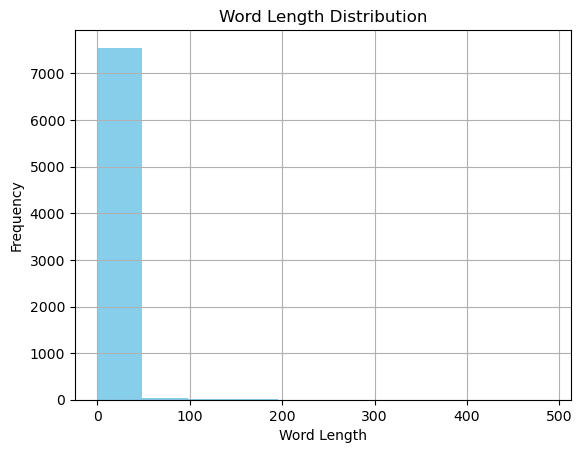

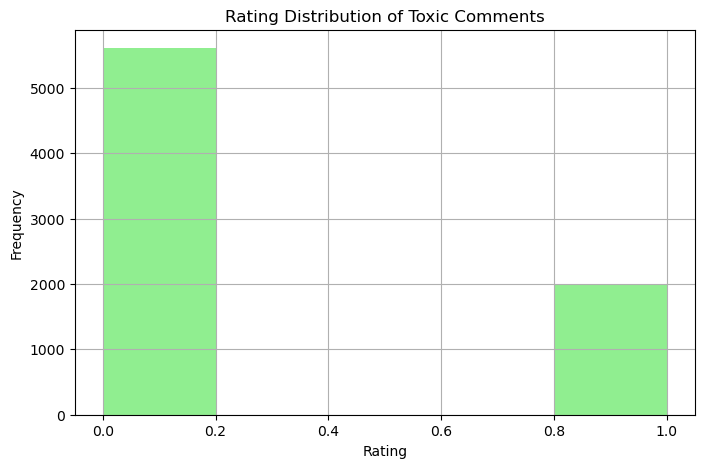

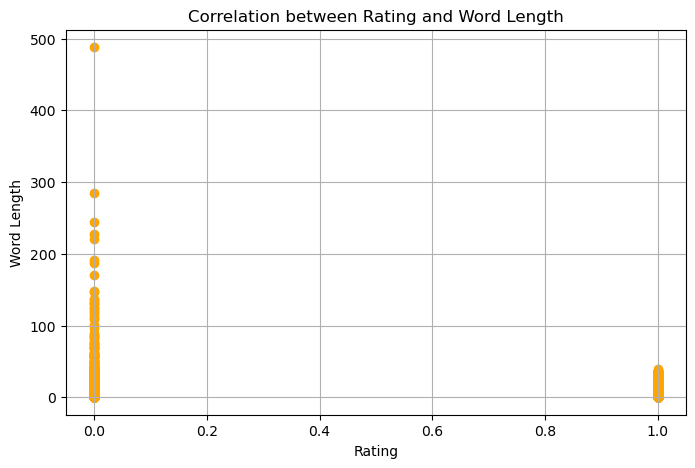

In [115]:
# Visualizing word length distribution
df['word_len'] = df['text'].apply(lambda x: len(x.split()))

plt.hist(df['word_len'], bins=10, color='skyblue')
plt.title('Word Length Distribution')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualizing rating distribution
plt.figure(figsize=(8, 5))
plt.hist(df['rating'], bins=5, color='lightgreen', align='mid')
plt.title('Rating Distribution of Toxic Comments')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Correlation between Rating and Word Length
plt.figure(figsize=(8, 5))
plt.scatter(df['rating'], df['word_len'], color='orange')
plt.title('Correlation between Rating and Word Length')
plt.xlabel('Rating')
plt.ylabel('Word Length')
plt.grid(True)
plt.show()

# Train test Split

In [56]:
X=df['text']
y=df['rating']

In [58]:
# Split the data into training and testing sets for each rating
X_train , X_test, y_train , y_test = train_test_split(X,y,random_state=37)

In [61]:
from collections import Counter
concatenated_text = ' '.join(X_train)

tokens = word_tokenize(concatenated_text)

word_counts = Counter(tokens)
unique_word_count = len(word_counts)
print("Number of unique words in X_train:", unique_word_count)

Number of unique words in X_train: 15561


# Definitions

In [64]:
max_features =15000
max_len=120

# TF-IDF

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=max_features) 

# Fit TF-IDF vectorizer on train and test
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Word2Vec Tokenizer
 1. Using CBOW
 2. Using Skip-gram

In [70]:
import gensim
from keras.preprocessing.sequence import pad_sequences

# Tokenize the text data
sentences = [line.split() for line in X_train]

def text_to_vectors_with_padding(text, model, max_len):
    vectors = []
    for sentence in text:
        vector = []
        for word in sentence.split():
            if word in model.wv:
                vector.append(model.wv[word])
            else:
                # Handle out-of-vocabulary (OOV) words by using a zero vector
                vector.append(np.zeros(model.vector_size))
        if vector:
            vectors.append(np.mean(vector, axis=0))
        else:
            vectors.append(np.zeros(model.vector_size))
    return pad_sequences(vectors, maxlen=max_len, padding='post', dtype='float32')

# CBOW

In [73]:
word2vec_model_cbow = gensim.models.Word2Vec(sentences=sentences, vector_size=max_len, window=4, min_count=1, workers=5)

In [74]:
# Convert text data into word embeddings with padding for both training and test data
X_train_vectors_w2v_cbow = text_to_vectors_with_padding(X_train, word2vec_model_cbow, max_len=max_len)
X_test_vectors_w2v_cbow = text_to_vectors_with_padding(X_test, word2vec_model_cbow, max_len=max_len)

# Skip-grams

In [78]:
word2vec_model_skip = gensim.models.Word2Vec(sentences=sentences, vector_size=max_len, window=4, min_count=1, workers=5 , sg=1)


In [79]:
# Convert text data into word embeddings with padding for both training and test data
X_train_vectors_w2v_skip = text_to_vectors_with_padding(X_train, word2vec_model_skip, max_len=max_len)
X_test_vectors_w2v_skip = text_to_vectors_with_padding(X_test, word2vec_model_skip, max_len=max_len)

# FastText
    1.CBOW
    2.SKIP

# CBOW

In [84]:
# Since fasttext uses words as tokens 
from gensim.models import FastText

In [86]:
X_train_tokenized = [word_tokenize(sentence) for sentence in X_train]
X_test_tokenized = [word_tokenize(sentence) for sentence in X_test]

In [87]:
Fast_text_model_cbow= FastText(X_train_tokenized , vector_size = max_len , window = 4 , min_count=1 , workers = 5 , sg =0 )

In [89]:
ftext_cbow = Fast_text_model_cbow.wv

In [90]:
# Convert text data into word embeddings with padding for both training and test data
X_train_vectors_fast_cbow = text_to_vectors_with_padding(X_train, Fast_text_model_cbow, max_len=max_len)
X_test_vectors_fast_cbow = text_to_vectors_with_padding(X_test, Fast_text_model_cbow, max_len=max_len)

# SkipGram

In [93]:
Fast_text_model_skip= FastText(X_train_tokenized , vector_size = max_len , window = 4 , min_count=1 , workers = 5 , sg = 1)

In [94]:
ftext_skip = Fast_text_model_skip.wv

In [95]:
# Convert text data into word embeddings with padding for both training and test data
X_train_vectors_fast_skip = text_to_vectors_with_padding(X_train, Fast_text_model_skip, max_len=max_len)
X_test_vectors_fast_skip = text_to_vectors_with_padding(X_test, Fast_text_model_skip, max_len=max_len)

In [96]:
X_train_list=[X_train_vectors_w2v_cbow,X_train_vectors_w2v_skip,X_train_vectors_fast_cbow,X_train_vectors_fast_skip]
X_test_list=[X_test_vectors_w2v_cbow,X_test_vectors_w2v_skip,X_test_vectors_fast_cbow,X_test_vectors_fast_skip]

# Gaussian Naive Bayes model

In [101]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss, hamming_loss, f1_score, roc_auc_score, precision_score, recall_score, matthews_corrcoef


def Run_Gausian_Naive_Bayes(X_train_vec , X_test_vec ,Model_name):
    Naive_Bayes_model = GaussianNB()
    Naive_Bayes_model.fit(X_train_vec, y_train)
    
    # Make predictions on the test set
    y_pred_Naive_bayes = Naive_Bayes_model.predict(X_test_vec)

    print("The Metrics of Naive Bayes using ", Model_name ," is" )
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_Naive_bayes)
    accuracies.append(accuracy)
    
    # Calculate precision, recall, and F1-score
    report = classification_report(y_test, y_pred_Naive_bayes, output_dict=True)
    precisions.append(report['1']['precision'])
    recalls.append(report['1']['recall'])
    f1_scores.append(report['1']['f1-score'])
    
    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred_Naive_bayes)
    roc_aucs.append(roc_auc)

    # Print metrics
    print("Accuracy:", accuracy)
    print("Precision:", report['1']['precision'])
    print("Recall:", report['1']['recall'])
    print("F1-score:", report['1']['f1-score'])
    print("ROC AUC:", roc_auc)
    print("\n")

The Metrics of Naive Bayes using  TF-idf  is
Accuracy: 0.8076720966894377
Precision: 0.6230636833046471
Recall: 0.7111984282907662
F1-score: 0.6642201834862386
ROC AUC: 0.7770482815772339


The Metrics of Naive Bayes using  CBOW using Word2Vec  is
Accuracy: 0.4771413557540725
Precision: 0.31393568147013784
Recall: 0.8055009823182712
F1-score: 0.45179063360881544
ROC AUC: 0.5813731597387626


The Metrics of Naive Bayes using  SkipGram using Word2Vec  is
Accuracy: 0.5554387808723069
Precision: 0.3408876298394712
Recall: 0.7092337917485265
F1-score: 0.4604591836734694
ROC AUC: 0.6042582158168744


The Metrics of Naive Bayes using  CBOW using FastText  is
Accuracy: 0.5496584340514976
Precision: 0.3104575163398693
Recall: 0.5599214145383105
F1-score: 0.39943938332165385
ROC AUC: 0.552916230942039


The Metrics of Naive Bayes using  SKIPgram using FastText  is
Accuracy: 0.535470310036784
Precision: 0.33480176211453744
Recall: 0.7465618860510805
F1-score: 0.4622871046228711
ROC AUC: 0.6024774

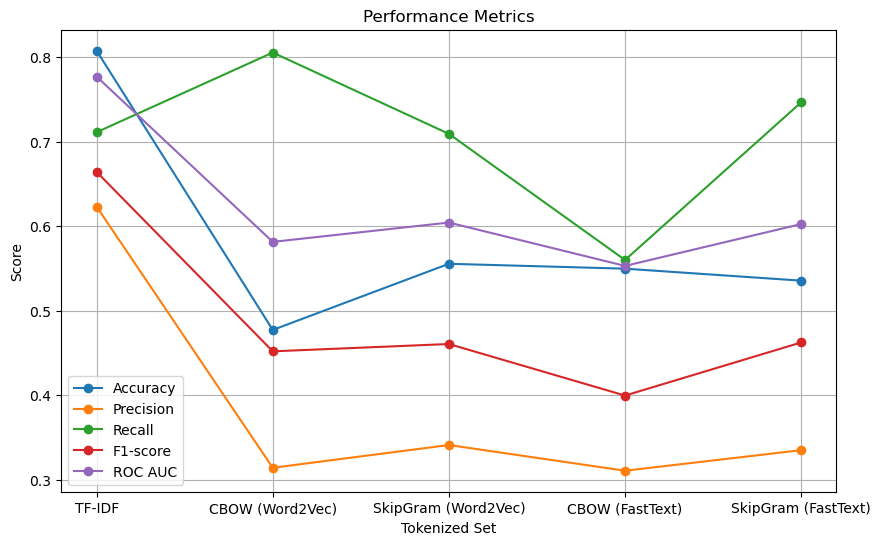

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists to store metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

Run_Gausian_Naive_Bayes(X_train_tfidf.toarray() , X_test_tfidf.toarray() ,'TF-idf')
Run_Gausian_Naive_Bayes(X_train_vectors_w2v_cbow , X_test_vectors_w2v_cbow ,'CBOW using Word2Vec')
Run_Gausian_Naive_Bayes(X_train_vectors_w2v_skip , X_test_vectors_w2v_skip ,'SkipGram using Word2Vec')
Run_Gausian_Naive_Bayes(X_train_vectors_fast_cbow , X_test_vectors_fast_cbow ,'CBOW using FastText')
Run_Gausian_Naive_Bayes(X_train_vectors_fast_skip , X_test_vectors_fast_skip ,'SKIPgram using FastText')

# Plotting metrics
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.plot(range(5), accuracies, label='Accuracy', marker='o')

# Plot precision
plt.plot(range(5), precisions, label='Precision', marker='o')

# Plot recall
plt.plot(range(5), recalls, label='Recall', marker='o')

# Plot F1-score
plt.plot(range(5), f1_scores, label='F1-score', marker='o')

# Plot ROC AUC
plt.plot(range(5), roc_aucs, label='ROC AUC', marker='o')

plt.title('Performance Metrics')
plt.xlabel('Tokenized Set')
plt.ylabel('Score')
plt.xticks(range(0,5), ['TF-IDF', 'CBOW (Word2Vec)', 'SkipGram (Word2Vec)', 'CBOW (FastText)', 'SkipGram (FastText)'])
plt.legend()
plt.grid(True)
plt.show()

# SVM's

In [35]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils import class_weight

In [36]:
def Run_SVM_model(X_train_vec ,X_test_vec , Model_name):
    # Calculate class weights to handle class imbalance
    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    
    # Initialize SVM model with class weights
    svm_model = SVC(kernel='linear', class_weight=dict(enumerate(class_weights)))
    
    # Train SVM model
    svm_model.fit(X_train_vec, y_train)
    
    # Make predictions on the test set
    y_pred_svm = svm_model.predict(X_test_vec)

    print("The Metrics of SVM's using ", Model_name ," is" )
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_svm)
    accuracies.append(accuracy)
    
    # Calculate precision, recall, and F1-score
    report = classification_report(y_test, y_pred_svm, output_dict=True)
    precisions.append(report['1']['precision'])
    recalls.append(report['1']['recall'])
    f1_scores.append(report['1']['f1-score'])
    
    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred_svm)
    roc_aucs.append(roc_auc)

    # Print metrics
    print("Accuracy:", accuracy)
    print("Precision:", report['1']['precision'])
    print("Recall:", report['1']['recall'])
    print("F1-score:", report['1']['f1-score'])
    print("ROC AUC:", roc_auc)
    print("\n")


The Metrics of SVM's using  TF-idf  is
Accuracy: 0.9468524251805985
Precision: 0.9367088607594937
Recall: 0.8588007736943907
F1-score: 0.8960645812310797
ROC AUC: 0.9188444403306578


The Metrics of SVM's using  CBOW using Word2Vec  is
Accuracy: 0.2977296181630547
Precision: 0.2745726495726496
Recall: 0.9941972920696325
F1-score: 0.43030556718292173
ROC AUC: 0.5192661337195452


The Metrics of SVM's using  SkipGram using Word2Vec  is
Accuracy: 0.6625386996904025
Precision: 0.39346811819595645
Recall: 0.48936170212765956
F1-score: 0.4362068965517241
ROC AUC: 0.6074535463488403


The Metrics of SVM's using  CBOW using FastText  is
Accuracy: 0.5500515995872033
Precision: 0.29336437718277064
Recall: 0.4874274661508704
F1-score: 0.36627906976744184
ROC AUC: 0.5301317485574901


The Metrics of SVM's using  SKIPgram using FastText  is
Accuracy: 0.8663570691434469
Precision: 0.8486486486486486
Recall: 0.6073500967117988
F1-score: 0.7080045095828635
ROC AUC: 0.7839706148583625




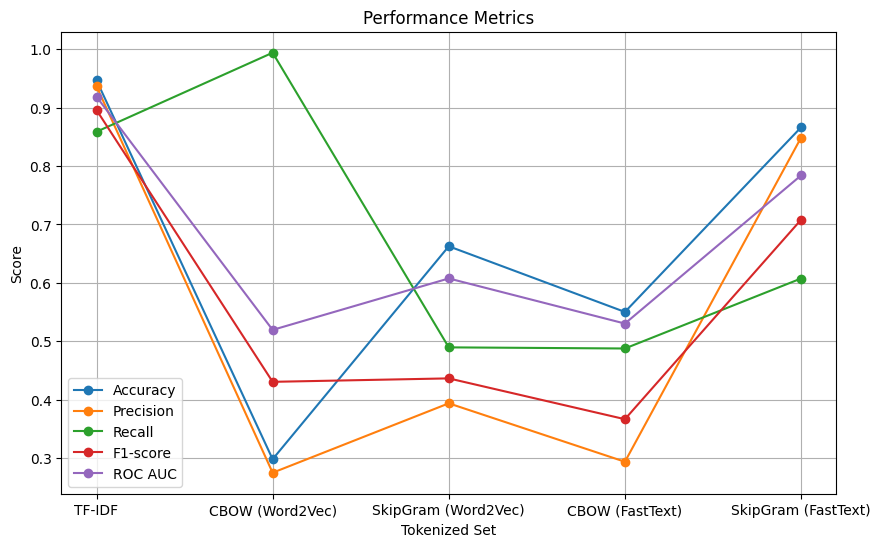

In [37]:
# Initialize lists to store metrics
# Initialize lists to store metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

Run_SVM_model(X_train_tfidf , X_test_tfidf ,'TF-idf')
Run_SVM_model(X_train_vectors_w2v_cbow , X_test_vectors_w2v_cbow ,'CBOW using Word2Vec')
Run_SVM_model(X_train_vectors_w2v_skip , X_test_vectors_w2v_skip ,'SkipGram using Word2Vec')
Run_SVM_model(X_train_vectors_fast_cbow , X_test_vectors_fast_cbow ,'CBOW using FastText')
Run_SVM_model(X_train_vectors_fast_skip , X_test_vectors_fast_skip ,'SKIPgram using FastText')

# Plotting metrics
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.plot(range(5), accuracies, label='Accuracy', marker='o')

# Plot precision
plt.plot(range(5), precisions, label='Precision', marker='o')

# Plot recall
plt.plot(range(5), recalls, label='Recall', marker='o')

# Plot F1-score
plt.plot(range(5), f1_scores, label='F1-score', marker='o')

# Plot ROC AUC
plt.plot(range(5), roc_aucs, label='ROC AUC', marker='o')

plt.title('Performance Metrics')
plt.xlabel('Tokenized Set')
plt.ylabel('Score')
plt.xticks(range(0,5), ['TF-IDF', 'CBOW (Word2Vec)', 'SkipGram (Word2Vec)', 'CBOW (FastText)', 'SkipGram (FastText)'])
plt.legend()
plt.grid(True)
plt.show()

# Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression

def Run_Logistic_Regression(X_train, X_test, model_name):
    # Initialize logistic regression model
    logistic_model = LogisticRegression(
        penalty='l2',
        C=1.0,
        solver='liblinear',
        max_iter=150,
        class_weight='balanced',
        tol=1e-4,
        fit_intercept=True,
        multi_class='auto'
    )
    
    # Train logistic regression model
    logistic_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_logistic = logistic_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_logistic)
    accuracies.append(accuracy)
    
    # Calculate precision, recall, and F1-score
    report = classification_report(y_test, y_pred_logistic, output_dict=True)
    precisions.append(report['1']['precision'])
    recalls.append(report['1']['recall'])
    f1_scores.append(report['1']['f1-score'])
    
    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred_logistic)
    roc_aucs.append(roc_auc)

    # Print metrics
    print("Metrics for", model_name)
    print("Accuracy:", accuracy)
    print("Precision:", report['1']['precision'])
    print("Recall:", report['1']['recall'])
    print("F1-score:", report['1']['f1-score'])
    print("ROC AUC:", roc_auc)
    print("\n")


Metrics for TF-idf
Accuracy: 0.9527062532842879
Precision: 0.9429175475687104
Recall: 0.8762278978388998
F1-score: 0.9083503054989817
ROC AUC: 0.9284295873699521


Metrics for CBOW using Word2Vec
Accuracy: 0.603258013662638
Precision: 0.3731958762886598
Recall: 0.7111984282907662
F1-score: 0.48951994590939824
ROC AUC: 0.637521739252987


Metrics for SkipGram using Word2Vec
Accuracy: 0.6305832895428272
Precision: 0.3866822429906542
Recall: 0.650294695481336
F1-score: 0.4849816849816849
ROC AUC: 0.6368403176115432


Metrics for CBOW using FastText
Accuracy: 0.5622700998423542
Precision: 0.30985915492957744
Recall: 0.518664047151277
F1-score: 0.3879500367376929
ROC AUC: 0.5484281498310186


Metrics for SKIPgram using FastText
Accuracy: 0.8050446663163426
Precision: 0.6098726114649682
Recall: 0.7524557956777996
F1-score: 0.6737027264731751
ROC AUC: 0.7883512837786415




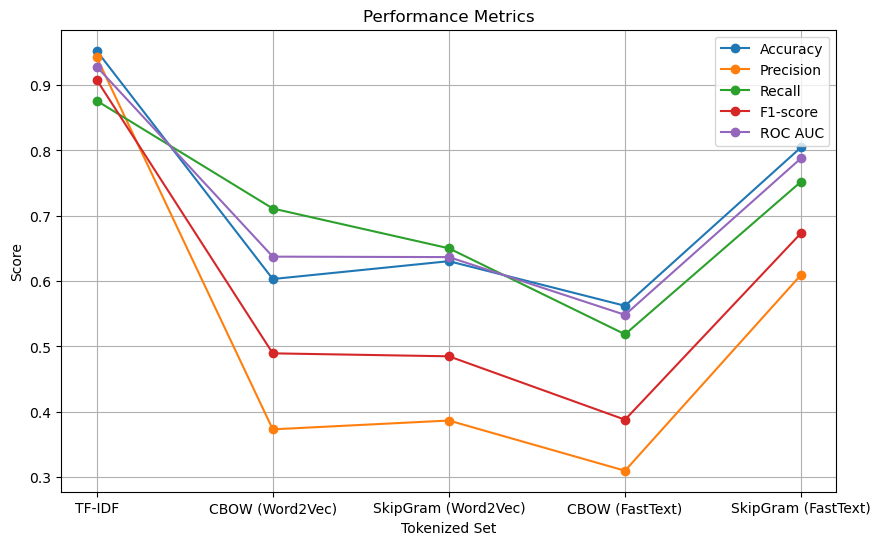

In [111]:
# Initialize lists to store metrics

accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

Run_Logistic_Regression(X_train_tfidf , X_test_tfidf ,'TF-idf')
Run_Logistic_Regression(X_train_vectors_w2v_cbow , X_test_vectors_w2v_cbow ,'CBOW using Word2Vec')
Run_Logistic_Regression(X_train_vectors_w2v_skip , X_test_vectors_w2v_skip ,'SkipGram using Word2Vec')
Run_Logistic_Regression(X_train_vectors_fast_cbow , X_test_vectors_fast_cbow ,'CBOW using FastText')
Run_Logistic_Regression(X_train_vectors_fast_skip , X_test_vectors_fast_skip ,'SKIPgram using FastText')

# Plotting metrics
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.plot(range(5), accuracies, label='Accuracy', marker='o')

# Plot precision
plt.plot(range(5), precisions, label='Precision', marker='o')

# Plot recall
plt.plot(range(5), recalls, label='Recall', marker='o')

# Plot F1-score
plt.plot(range(5), f1_scores, label='F1-score', marker='o')

# Plot ROC AUC
plt.plot(range(5), roc_aucs, label='ROC AUC', marker='o')

plt.title('Performance Metrics')
plt.xlabel('Tokenized Set')
plt.ylabel('Score')
plt.xticks(range(0,5), ['TF-IDF', 'CBOW (Word2Vec)', 'SkipGram (Word2Vec)', 'CBOW (FastText)', 'SkipGram (FastText)'])
plt.legend()
plt.grid(True)
plt.show()

# Random forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
# Function to run Random Forest Classifier and calculate metrics
def run_random_forest(X_train, X_test, model_name):
    
    # Initialize Random Forest Classifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Train Random Forest Classifier
    rf_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_rf = rf_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_rf)
    accuracies.append(accuracy)
    
    # Calculate precision, recall, and F1-score
    report = classification_report(y_test, y_pred_rf, output_dict=True)
    precisions.append(report['1']['precision'])
    recalls.append(report['1']['recall'])
    f1_scores.append(report['1']['f1-score'])
    
    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred_rf)
    roc_aucs.append(roc_auc)

    # Print metrics
    print("Metrics for", model_name)
    print("Accuracy:", accuracy)
    print("Precision:", report['1']['precision'])
    print("Recall:", report['1']['recall'])
    print("F1-score:", report['1']['f1-score'])
    print("ROC AUC:", roc_auc)
    print("\n")


In [41]:
# Initialize lists to store metrics

accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []
# Run Random Forest Classifier for each tokenized set
run_random_forest(X_train_tfidf, X_test_tfidf, 'TF-IDF')
run_random_forest(X_train_vectors_w2v_cbow, X_test_vectors_w2v_cbow, 'CBOW using Word2Vec')
run_random_forest(X_train_vectors_w2v_skip, X_test_vectors_w2v_skip, 'SkipGram using Word2Vec')
run_random_forest(X_train_vectors_fast_cbow, X_test_vectors_fast_cbow, 'CBOW using FastText')
run_random_forest(X_train_vectors_fast_skip, X_test_vectors_fast_skip, 'SKIPgram using FastText')



Metrics for TF-IDF
Accuracy: 0.9545923632610939
Precision: 0.9612903225806452
Recall: 0.8646034816247582
F1-score: 0.9103869653767821
ROC AUC: 0.9259681729024565


Metrics for CBOW using Word2Vec
Accuracy: 0.7812177502579979
Precision: 0.8549618320610687
Recall: 0.21663442940038685
F1-score: 0.345679012345679
ROC AUC: 0.6016317819063862


Metrics for SkipGram using Word2Vec
Accuracy: 0.8132094943240454
Precision: 0.8780487804878049
Recall: 0.3481624758220503
F1-score: 0.4986149584487535
ROC AUC: 0.6652846158139104


Metrics for CBOW using FastText
Accuracy: 0.7884416924664602
Precision: 0.7336244541484717
Recall: 0.32495164410058025
F1-score: 0.450402144772118
ROC AUC: 0.6410120641333302


Metrics for SKIPgram using FastText
Accuracy: 0.8452012383900929
Precision: 0.8318042813455657
Recall: 0.5261121856866537
F1-score: 0.6445497630331753
ROC AUC: 0.7437035242296746




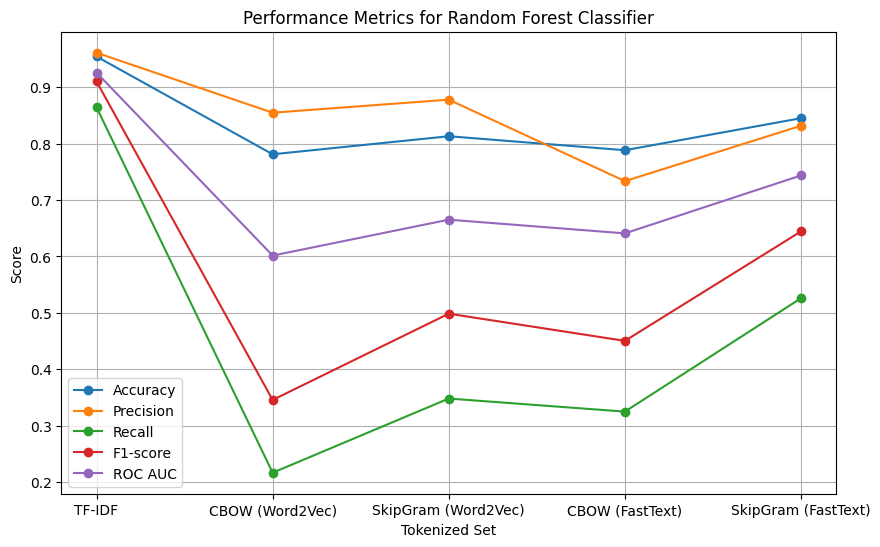

In [42]:
# Plotting metrics
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.plot(range(5), accuracies, label='Accuracy', marker='o')

# Plot precision
plt.plot(range(5), precisions, label='Precision', marker='o')

# Plot recall
plt.plot(range(5), recalls, label='Recall', marker='o')

# Plot F1-score
plt.plot(range(5), f1_scores, label='F1-score', marker='o')

# Plot ROC AUC
plt.plot(range(5), roc_aucs, label='ROC AUC', marker='o')

plt.title('Performance Metrics for Random Forest Classifier')
plt.xlabel('Tokenized Set')
plt.ylabel('Score')
plt.xticks(range(5), ['TF-IDF', 'CBOW (Word2Vec)', 'SkipGram (Word2Vec)', 'CBOW (FastText)', 'SkipGram (FastText)'])
plt.legend()
plt.grid(True)
plt.show()

# XGB Classifier

In [43]:
import xgboost as xgb
# Function to run XGBoost and calculate metrics
def run_xgboost(X_train, X_test, model_name):
    # Initialize XGBoost classifier
    xgb_model = xgb.XGBClassifier()
    
    # Train XGBoost classifier
    xgb_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_xgb = xgb_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_xgb)
    accuracies.append(accuracy)
    
    # Calculate precision, recall, and F1-score
    report = classification_report(y_test, y_pred_xgb, output_dict=True)
    precisions.append(report['1']['precision'])
    recalls.append(report['1']['recall'])
    f1_scores.append(report['1']['f1-score'])
    
    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred_xgb)
    roc_aucs.append(roc_auc)

    # Print metrics
    print("Metrics for", model_name)
    print("Accuracy:", accuracy)
    print("Precision:", report['1']['precision'])
    print("Recall:", report['1']['recall'])
    print("F1-score:", report['1']['f1-score'])
    print("ROC AUC:", roc_auc)
    print("\n")

    return xgb_model

In [44]:
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

# Run XGBoost for each tokenized set
a=run_xgboost(X_train_tfidf, X_test_tfidf, 'TF-IDF')
b=run_xgboost(X_train_vectors_w2v_cbow, X_test_vectors_w2v_cbow, 'CBOW using Word2Vec')
c=run_xgboost(X_train_vectors_w2v_skip, X_test_vectors_w2v_skip, 'SkipGram using Word2Vec')
d=run_xgboost(X_train_vectors_fast_cbow, X_test_vectors_fast_cbow, 'CBOW using FastText')
e=run_xgboost(X_train_vectors_fast_skip, X_test_vectors_fast_skip, 'SKIPgram using FastText')

Metrics for TF-IDF
Accuracy: 0.9365325077399381
Precision: 0.9712918660287081
Recall: 0.7852998065764023
F1-score: 0.8684491978609625
ROC AUC: 0.8884275246815861


Metrics for CBOW using Word2Vec
Accuracy: 0.8199174406604747
Precision: 0.7937062937062938
Recall: 0.43907156673114117
F1-score: 0.5653798256537983
ROC AUC: 0.6987757552163799


Metrics for SkipGram using Word2Vec
Accuracy: 0.8230134158926729
Precision: 0.7861842105263158
Recall: 0.4622823984526112
F1-score: 0.582216808769793
ROC AUC: 0.7082699817738074


Metrics for CBOW using FastText
Accuracy: 0.7776057791537667
Precision: 0.6396103896103896
Recall: 0.38104448742746616
F1-score: 0.4775757575757576
ROC AUC: 0.6514652416025438


Metrics for SKIPgram using FastText
Accuracy: 0.8534571723426213
Precision: 0.7964376590330788
Recall: 0.6054158607350096
F1-score: 0.6879120879120879
ROC AUC: 0.7745587396567378




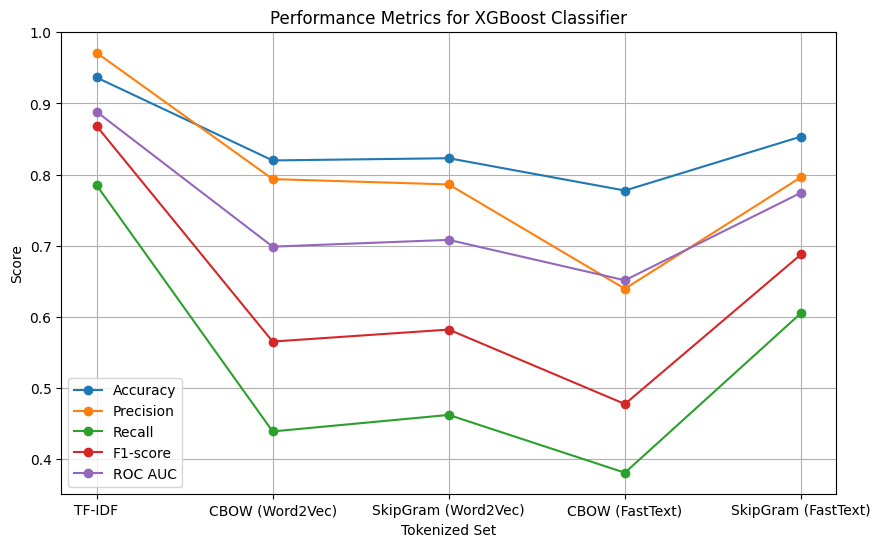

In [45]:
# Plotting metrics
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.plot(range(5), accuracies, label='Accuracy', marker='o')

# Plot precision
plt.plot(range(5), precisions, label='Precision', marker='o')

# Plot recall
plt.plot(range(5), recalls, label='Recall', marker='o')

# Plot F1-score
plt.plot(range(5), f1_scores, label='F1-score', marker='o')

# Plot ROC AUC
plt.plot(range(5), roc_aucs, label='ROC AUC', marker='o')

plt.title('Performance Metrics for XGBoost Classifier')
plt.xlabel('Tokenized Set')
plt.ylabel('Score')
plt.xticks(range(5), ['TF-IDF', 'CBOW (Word2Vec)', 'SkipGram (Word2Vec)', 'CBOW (FastText)', 'SkipGram (FastText)'])
plt.legend()
plt.grid(True)
plt.show()